# # Data_analysis of NYPD dataset

Python imports are essential for successfully organising your code.
We import the required libraries to help in data extraction, cleaning and plotting graphs.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from math import radians, sin, cos, acos
import warnings
warnings.filterwarnings("ignore")

Use pandas to import/read the input file. 

In [2]:
data = pd.read_csv("NYPD_Arrests_Data__Historic_.csv")

Check whether there are any NaN values.

In [3]:
data.isnull().sum()

ARREST_KEY               0
ARREST_DATE              0
PD_CD                  220
PD_DESC               8870
KY_CD                 8870
OFNS_DESC             8870
LAW_CODE               196
LAW_CAT_CD           16103
ARREST_BORO              8
ARREST_PRECINCT          0
JURISDICTION_CODE       10
AGE_GROUP               17
PERP_SEX                 0
PERP_RACE                0
X_COORD_CD               1
Y_COORD_CD               1
Latitude                 1
Longitude                1
dtype: int64

Create a copy of the data frame rather than changing the original data frame. Work with the copy to avoid unnecessary changes to the original file.
We will have an original file to compare the altered version with this.

In [4]:
data1 = data.copy()

In [5]:
data1

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,173130602,12/31/2017,566.0,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0.0,25-44,M,BLACK,1063056.0,207463.0,40.735772,-73.715638
1,173114463,12/31/2017,478.0,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,114,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113.0,219613.0,40.769437,-73.910241
2,173113513,12/31/2017,849.0,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,73,1.0,18-24,M,BLACK,1010719.0,186857.0,40.679525,-73.904572
3,173113423,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,25-44,M,WHITE,987831.0,217446.0,40.763523,-73.987074
4,173113421,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,45-64,M,BLACK,987073.0,216078.0,40.759768,-73.989811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798334,173142136,01/01/2018,639.0,AGGRAVATED HARASSMENT 2,361.0,OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV,PL 2403002,M,B,41,0.0,25-44,F,WHITE HISPANIC,1013086.0,236614.0,40.816088,-73.895824
4798335,173135232,01/01/2018,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,44,0.0,25-44,M,BLACK HISPANIC,1007649.0,243339.0,40.834562,-73.915443
4798336,173134328,01/01/2018,397.0,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105.0,ROBBERY,PL 1601503,F,M,10,0.0,45-64,M,BLACK,983620.0,208914.0,40.740105,-74.002275
4798337,173134322,01/01/2018,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,M,30,0.0,25-44,M,BLACK HISPANIC,998981.0,242209.0,40.831479,-73.946770


The fillna() function substitutes a value in place of NaN values.

In [6]:
data1.fillna(0,inplace=True)

In [7]:
data1.isnull().sum()

ARREST_KEY           0
ARREST_DATE          0
PD_CD                0
PD_DESC              0
KY_CD                0
OFNS_DESC            0
LAW_CODE             0
LAW_CAT_CD           0
ARREST_BORO          0
ARREST_PRECINCT      0
JURISDICTION_CODE    0
AGE_GROUP            0
PERP_SEX             0
PERP_RACE            0
X_COORD_CD           0
Y_COORD_CD           0
Latitude             0
Longitude            0
dtype: int64

Use the panda's package to convert the string objects in the "ARREST_DATE" column to datetime objects.

In [8]:
 data1['ARREST_DATE'] =  pd.to_datetime(data1['ARREST_DATE'])

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4798339 entries, 0 to 4798338
Data columns (total 18 columns):
 #   Column             Dtype         
---  ------             -----         
 0   ARREST_KEY         int64         
 1   ARREST_DATE        datetime64[ns]
 2   PD_CD              float64       
 3   PD_DESC            object        
 4   KY_CD              float64       
 5   OFNS_DESC          object        
 6   LAW_CODE           object        
 7   LAW_CAT_CD         object        
 8   ARREST_BORO        object        
 9   ARREST_PRECINCT    int64         
 10  JURISDICTION_CODE  float64       
 11  AGE_GROUP          object        
 12  PERP_SEX           object        
 13  PERP_RACE          object        
 14  X_COORD_CD         float64       
 15  Y_COORD_CD         float64       
 16  Latitude           float64       
 17  Longitude          float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(8)
memory usage: 659.0+ MB


For our project team, we need to analyze the data of 2006 and 2018, so we filter the 2006 and 2018 data using pandas.loc function.

In [10]:
dataFiltered = data1.loc[((data1['ARREST_DATE'] >= '2006-01-01') & (data1['ARREST_DATE'] < '2007-01-01') | (data1['ARREST_DATE'] >= '2018-01-01') & (data1['ARREST_DATE'] < '2019-01-01') )]

Check the length(No. of records) of the filtered data for the years 2006 and 2018.

In [11]:
len(dataFiltered)

618707

Create "Year" and "Month" columns by extracting the values from the "ARREST_DATE" column.

In [12]:
dataFiltered['Year'] = pd.DatetimeIndex(dataFiltered['ARREST_DATE']).year
dataFiltered['Month'] = pd.DatetimeIndex(dataFiltered['ARREST_DATE']).month

Reset the index and drop the index column.Only remove the appropriate levels from the index for a Series with a MultiIndex. By default, all levels are removed. Reset the index in the new DataFrame without adding it as a column.

In [13]:
dataFiltered.reset_index(inplace=True)

In [14]:
dataFiltered.drop(['index'],axis=1,inplace=True)

In [15]:
dataFiltered

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Year,Month
0,26043689,2006-12-31,793.0,WEAPONS POSSESSION 3,118.0,DANGEROUS WEAPONS,PL 2650205,F,B,44,0.0,18-24,M,BLACK HISPANIC,1008669.0,246692.0,40.843762,-73.911745,2006,12
1,26029858,2006-12-31,567.0,"MARIJUANA, POSSESSION 4 & 5",235.0,DANGEROUS DRUGS,PL 2211500,M,S,123,0.0,18-24,M,WHITE,934968.0,136245.0,40.540508,-74.177311,2006,12
2,26029459,2006-12-31,759.0,"PUBLIC ADMINISTATION,UNCLASS MISDEMEAN 4",359.0,OFFENSES AGAINST PUBLIC ADMINISTRATION,PL 1950500,M,B,40,2.0,18-24,M,BLACK,1005947.0,235372.0,40.812699,-73.921620,2006,12
3,26029450,2006-12-31,515.0,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,B,47,0.0,25-44,M,BLACK,1025612.0,268457.0,40.903437,-73.850375,2006,12
4,26018937,2006-12-31,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 140100F,M,Q,101,0.0,18-24,M,BLACK,1043516.0,157081.0,40.597637,-73.786589,2006,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618702,173142136,2018-01-01,639.0,AGGRAVATED HARASSMENT 2,361.0,OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV,PL 2403002,M,B,41,0.0,25-44,F,WHITE HISPANIC,1013086.0,236614.0,40.816088,-73.895824,2018,1
618703,173135232,2018-01-01,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,44,0.0,25-44,M,BLACK HISPANIC,1007649.0,243339.0,40.834562,-73.915443,2018,1
618704,173134328,2018-01-01,397.0,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105.0,ROBBERY,PL 1601503,F,M,10,0.0,45-64,M,BLACK,983620.0,208914.0,40.740105,-74.002275,2018,1
618705,173134322,2018-01-01,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,M,30,0.0,25-44,M,BLACK HISPANIC,998981.0,242209.0,40.831479,-73.946770,2018,1


In [16]:
dataFiltered[dataFiltered['Year']==2006]['AGE_GROUP'].value_counts()

25-44      174717
18-24       98326
45-64       59310
<18         37179
65+          2300
0              17
894             7
945             5
UNKNOWN         5
935             5
932             3
895             3
943             3
944             2
920             2
912             2
951             2
929             2
947             2
938             2
952             2
928             2
921             2
931             2
352             1
708             1
948             1
194             1
316             1
816             1
939             1
237             1
949             1
933             1
922             1
740             1
956             1
339             1
946             1
940             1
309             1
959             1
941             1
927             1
910             1
446             1
942             1
330             1
320             1
955             1
723             1
934             1
930             1
965             1
323             1
338       

Creating sample dataframe from filtered data to analyse the data.
Once the algorithm is developed test it on this sample and later implement on the whole.
The code written to test the sample is removed after testing and only the main code for the whole set will be made available in the document.


In [17]:
DataFilteredSample  = dataFiltered.sample(n=75,random_state=2181998)

In [18]:
DataFilteredSample

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Year,Month
505199,183463636,2018-06-04,205.0,"TRESPASS 2, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 1401500,M,Q,109,0.0,25-44,M,UNKNOWN,1026496.0,221242.0,40.773842,-73.847474,2018,6
41450,25336228,2006-11-16,969.0,"TRAFFIC,UNCLASSIFIED INFRACTION",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,M,34,0.0,25-44,M,WHITE HISPANIC,1006670.0,254235.0,40.864471,-73.918945,2006,11
331955,10334553,2006-02-08,205.0,"TRESPASS 2, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 1401500,M,K,81,0.0,45-64,M,BLACK,1003562.0,186782.0,40.679337,-73.930375,2006,2
21374,25682711,2006-12-07,569.0,"MARIJUANA, SALE 4 & 5",235.0,DANGEROUS DRUGS,PL 2214000,M,K,61,0.0,25-44,M,WHITE,999929.0,151922.0,40.583661,-73.943554,2006,12
560025,176022954,2018-03-18,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,68,0.0,45-64,M,WHITE,979227.0,170035.0,40.633390,-74.018099,2018,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613386,173403526,2018-01-09,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0.0,25-44,M,BLACK,1006195.0,240321.0,40.826282,-73.920708,2018,1
184129,16942077,2006-07-01,849.0,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,79,1.0,45-64,M,BLACK,998241.0,187165.0,40.680399,-73.949558,2006,7
325810,10388835,2006-02-15,205.0,"TRESPASS 2, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 1401500,M,M,10,0.0,18-24,M,BLACK,985591.0,215684.0,40.758687,-73.995161,2006,2
590775,174444845,2018-02-06,918.0,RECKLESS DRIVING,348.0,VEHICLE AND TRAFFIC LAWS,VTL1212000,M,K,63,0.0,18-24,M,WHITE,1004620.0,163933.0,40.616619,-73.926630,2018,2


## a)Analysis of the NYPD arrest data for the years 2006 and 2018 for each of the 5 boroughs(using the ARREST_BORO attribute)

First, let us compare the crime rate for the given years.
The first graph depicts the number of crimes committed during the given year.

<AxesSubplot: title={'center': 'Total Crime Events by Year'}>

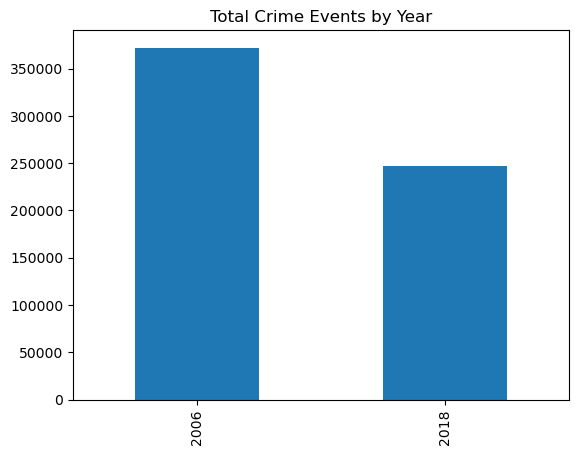

In [19]:
dataFiltered['Year'].value_counts().plot(kind="bar", title = "Total Crime Events by Year")

In [20]:
dataFiltered[dataFiltered['Year']==2006]

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Year,Month
0,26043689,2006-12-31,793.0,WEAPONS POSSESSION 3,118.0,DANGEROUS WEAPONS,PL 2650205,F,B,44,0.0,18-24,M,BLACK HISPANIC,1008669.0,246692.0,40.843762,-73.911745,2006,12
1,26029858,2006-12-31,567.0,"MARIJUANA, POSSESSION 4 & 5",235.0,DANGEROUS DRUGS,PL 2211500,M,S,123,0.0,18-24,M,WHITE,934968.0,136245.0,40.540508,-74.177311,2006,12
2,26029459,2006-12-31,759.0,"PUBLIC ADMINISTATION,UNCLASS MISDEMEAN 4",359.0,OFFENSES AGAINST PUBLIC ADMINISTRATION,PL 1950500,M,B,40,2.0,18-24,M,BLACK,1005947.0,235372.0,40.812699,-73.921620,2006,12
3,26029450,2006-12-31,515.0,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,B,47,0.0,25-44,M,BLACK,1025612.0,268457.0,40.903437,-73.850375,2006,12
4,26018937,2006-12-31,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 140100F,M,Q,101,0.0,18-24,M,BLACK,1043516.0,157081.0,40.597637,-73.786589,2006,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371929,9929890,2006-01-01,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0.0,18-24,F,BLACK,1007418.0,243859.0,40.835990,-73.916276,2006,1
371930,9929888,2006-01-01,625.0,"DISORDERLY CONDUCT SUBD 1,2,3,4,5,6,7",572.0,DISORDERLY CONDUCT,PL 2402001,V,B,52,0.0,25-44,M,WHITE HISPANIC,1013169.0,255021.0,40.866609,-73.895445,2006,1
371931,9929860,2006-01-01,748.0,"CONTEMPT,CRIMINAL",359.0,OFFENSES AGAINST PUBLIC ADMINISTRATION,PL 2155003,M,B,41,0.0,25-44,M,BLACK,1015845.0,236500.0,40.815765,-73.885857,2006,1
371932,9929834,2006-01-01,750.0,RESISTING ARREST,359.0,OFFENSES AGAINST PUBLIC ADMINISTRATION,PL 2053000,M,B,47,0.0,18-24,M,BLACK,1020534.0,256806.0,40.871481,-73.868807,2006,1


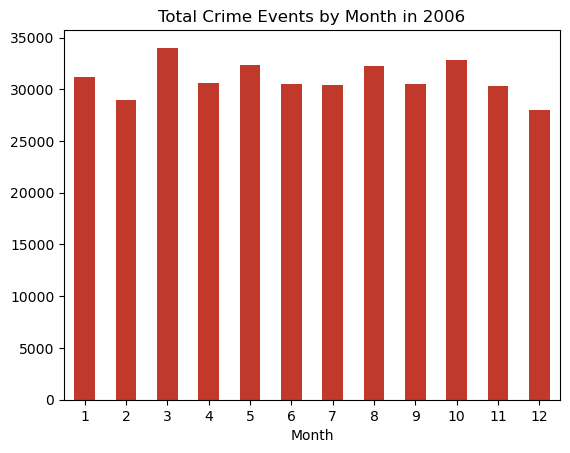

In [21]:
dataFiltered[dataFiltered['Year']==2006].groupby('Month').size().plot(kind = 'bar', title ='Total Crime Events by Month in 2006', color = '#C0392B',rot=0)
plt.savefig('total_crimes_per_month_2006.png', format='png')

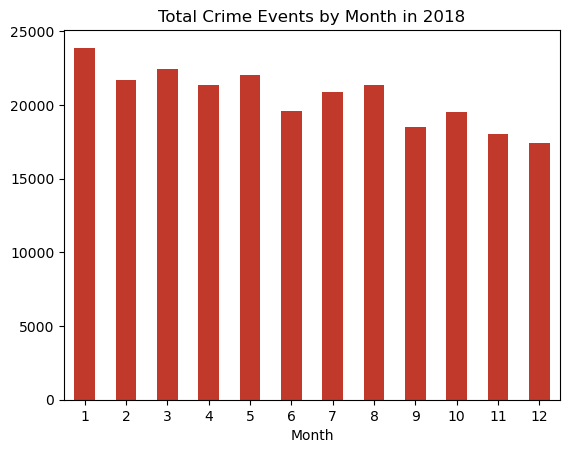

In [22]:
dataFiltered[dataFiltered['Year']==2018].groupby('Month').size().plot(kind = 'bar', title ='Total Crime Events by Month in 2018', color = '#C0392B',rot=0)
plt.savefig('total_crimes_per_month_2018.png', format='png')

From the above graphs,the number of crimes are very high in March,May and January whereas October, November, and December appear to be safer.

In [23]:
dataFiltered


,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Year,Month
0,26043689,2006-12-31,793.0,WEAPONS POSSESSION 3,118.0,DANGEROUS WEAPONS,PL 2650205,F,B,44,0.0,18-24,M,BLACK HISPANIC,1008669.0,246692.0,40.843762,-73.911745,2006,12
1,26029858,2006-12-31,567.0,"MARIJUANA, POSSESSION 4 & 5",235.0,DANGEROUS DRUGS,PL 2211500,M,S,123,0.0,18-24,M,WHITE,934968.0,136245.0,40.540508,-74.177311,2006,12
2,26029459,2006-12-31,759.0,"PUBLIC ADMINISTATION,UNCLASS MISDEMEAN 4",359.0,OFFENSES AGAINST PUBLIC ADMINISTRATION,PL 1950500,M,B,40,2.0,18-24,M,BLACK,1005947.0,235372.0,40.812699,-73.921620,2006,12
3,26029450,2006-12-31,515.0,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,B,47,0.0,25-44,M,BLACK,1025612.0,268457.0,40.903437,-73.850375,2006,12
4,26018937,2006-12-31,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 140100F,M,Q,101,0.0,18-24,M,BLACK,1043516.0,157081.0,40.597637,-73.786589,2006,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618702,173142136,2018-01-01,639.0,AGGRAVATED HARASSMENT 2,361.0,OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV,PL 2403002,M,B,41,0.0,25-44,F,WHITE HISPANIC,1013086.0,236614.0,40.816088,-73.895824,2018,1
618703,173135232,2018-01-01,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,44,0.0,25-44,M,BLACK HISPANIC,1007649.0,243339.0,40.834562,-73.915443,2018,1
618704,173134328,2018-01-01,397.0,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105.0,ROBBERY,PL 1601503,F,M,10,0.0,45-64,M,BLACK,983620.0,208914.0,40.740105,-74.002275,2018,1
618705,173134322,2018-01-01,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,M,30,0.0,25-44,M,BLACK HISPANIC,998981.0,242209.0,40.831479,-73.946770,2018,1


In [24]:
dataFiltered['Year'].value_counts()

2006    371934
2018    246773
Name: Year, dtype: int64

Compare the number of arrests for misdemeanor (M) and violation (V) for given years and save it as a png file.

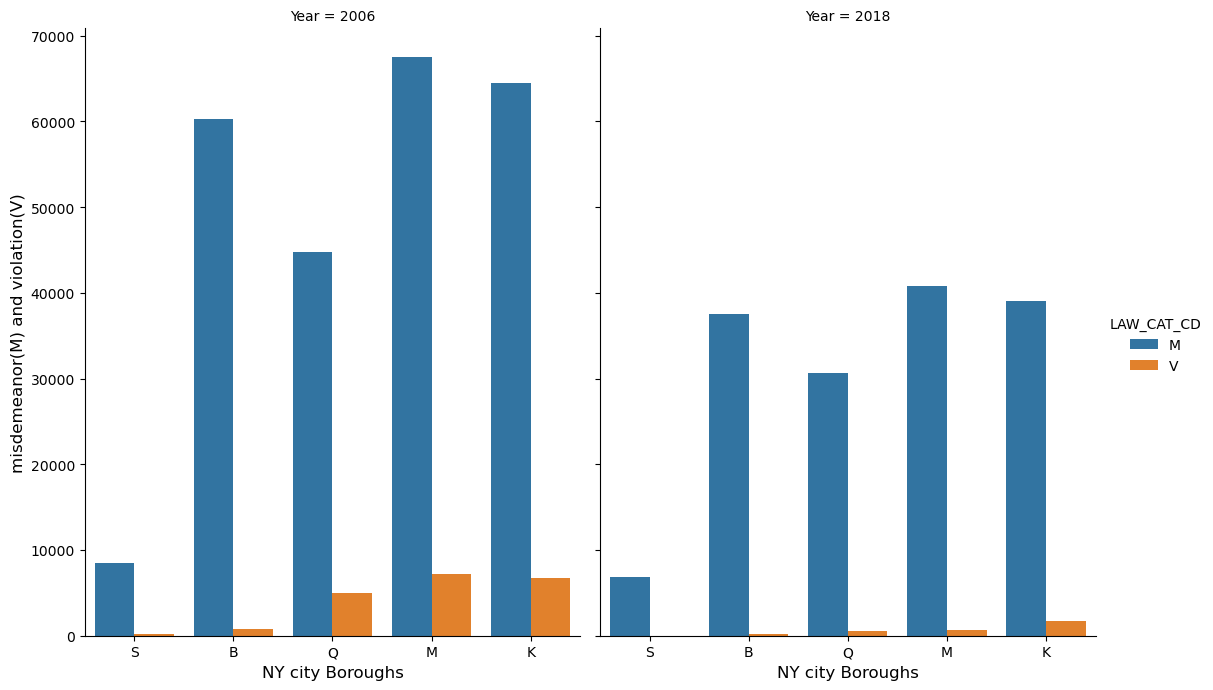

In [25]:

a = sns.catplot(x="ARREST_BORO", hue='LAW_CAT_CD', col="Year",data=dataFiltered[(dataFiltered["LAW_CAT_CD"] == 'M') | (dataFiltered["LAW_CAT_CD"] == 'V') ], kind="count",height=7, aspect=.8)
a.set_xlabels('NY city Boroughs', fontsize=12)
a.set_ylabels('misdemeanor(M) and violation(V)', fontsize=12)
a.savefig('output_Law_CAT_CD.png', dpi=300)


Count the total number of crimes in each borough during the years 2006 and 2018 and save it as png file.


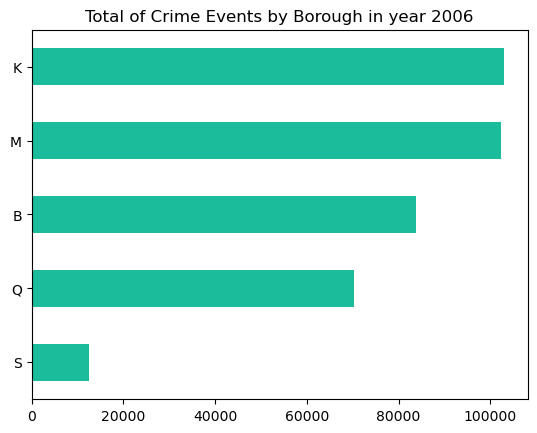

In [26]:
dataFiltered[dataFiltered['Year']==2006]['ARREST_BORO'].value_counts().sort_values().plot(kind="barh", color = '#1ABC9C', title = 'Total of Crime Events by Borough in year 2006')
plt.savefig('total_crimes in 2006.png', format='png')


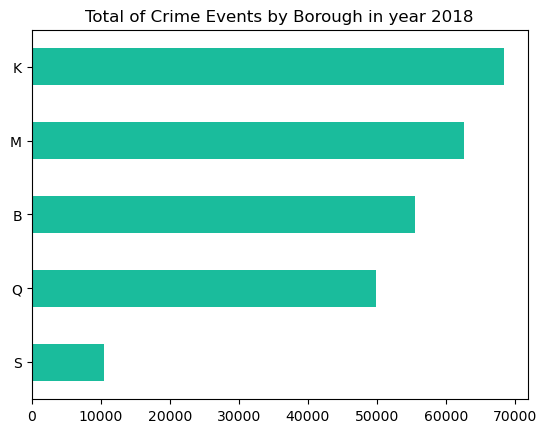

In [27]:
dataFiltered[dataFiltered['Year']==2018]['ARREST_BORO'].value_counts().sort_values().plot(kind="barh", color = '#1ABC9C', title = 'Total of Crime Events by Borough in year 2018')
plt.savefig('total_crimes in 2018.png', format='png')


In [28]:
dataFiltered['ARREST_BORO'].value_counts().sort_values()

S     22830
Q    120160
B    139341
M    164938
K    171438
Name: ARREST_BORO, dtype: int64

According to this visualization, K has the overall highest numeventsber of crime.

compare the number of arrests based on gender for each year and save it as png file.

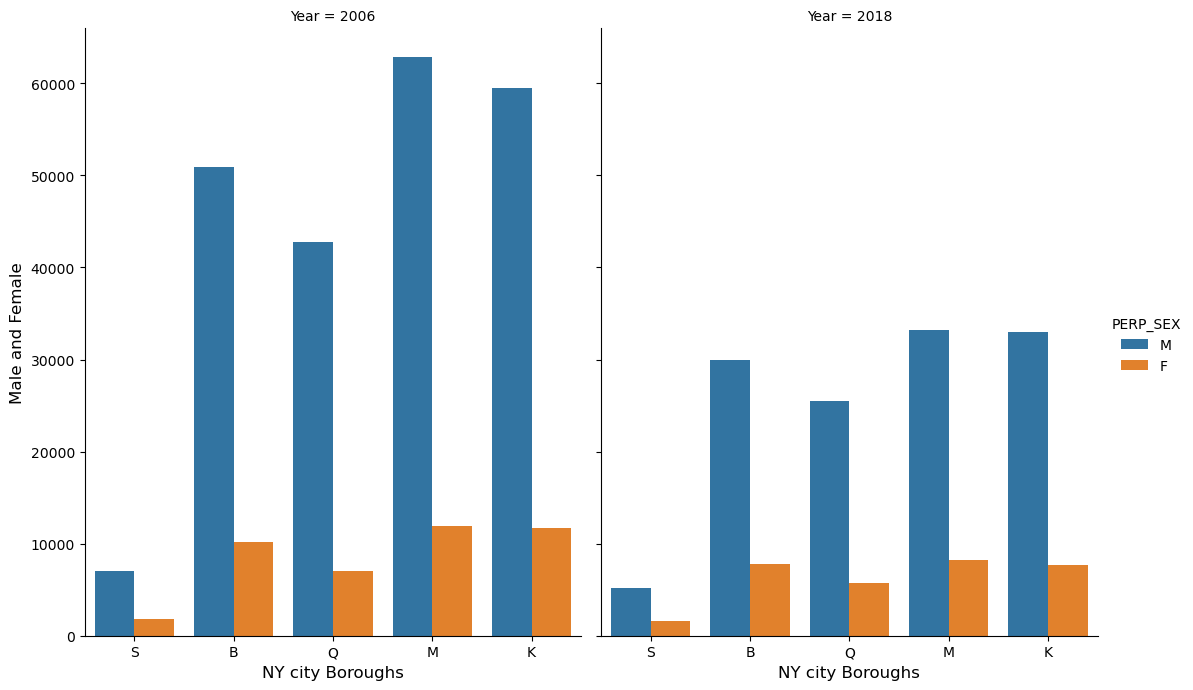

In [29]:
a=sns.catplot(x="ARREST_BORO",hue='PERP_SEX',col="Year",data=dataFiltered[(dataFiltered["LAW_CAT_CD"] == 'M') | (dataFiltered["LAW_CAT_CD"] == 'V') ], kind="count",height=7, aspect=.8)
a.set_xlabels('NY city Boroughs', fontsize=12)
a.set_ylabels('Male and Female', fontsize=12)
a.savefig('output_Male and Female.png', dpi=300)

We can observe that the distribution of crimes done by males and females during both the years 2006 and 2018 show a similar proportion.

Following draw plot based on the race to find any pattern or changes happened between the time 2006 and 2018.

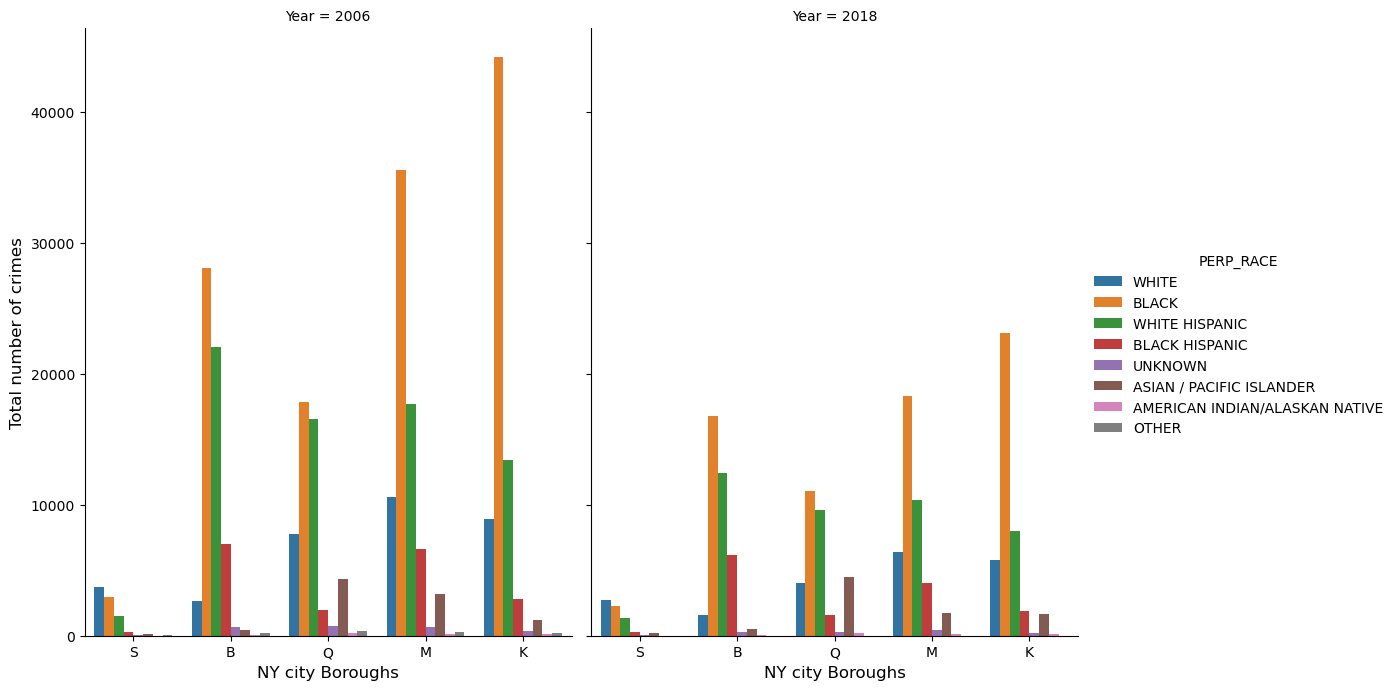

In [30]:
a=sns.catplot(x="ARREST_BORO",hue='PERP_RACE',col="Year",data=dataFiltered[(dataFiltered["LAW_CAT_CD"] == 'M') | (dataFiltered["LAW_CAT_CD"] == 'V') ], kind="count",height=7, aspect=.8)
a.set_xlabels('NY city Boroughs', fontsize=12)
a.set_ylabels('Total number of crimes', fontsize=12)
a.savefig('output_PERP_RACE.png', dpi=720)

We can see the ratio of crimes by the different races has seen no change in any of the boroughs when we compare the 2006 and 2018 with black people hvaing major contribution in every borugh except in the Staten Land.

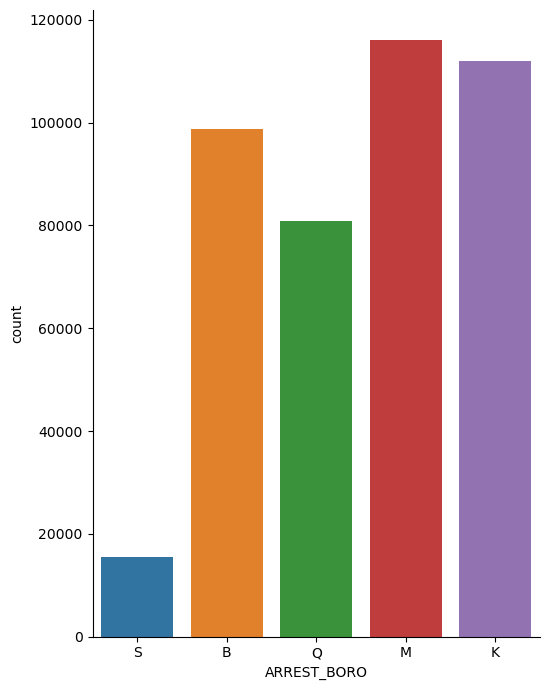

In [31]:
ax = sns.catplot(x="ARREST_BORO",data=dataFiltered[(dataFiltered["LAW_CAT_CD"] == 'M') | (dataFiltered["LAW_CAT_CD"] == 'V') ], kind="count",height=7, aspect=.8)
ax.savefig('output_Total.png', dpi=720)

## b)Identify the age group Which has the most number of arrests in M or V category for each borough and compare the number of arrests of different age groups each year and save the png file 

In [32]:
#Check the age distribution by grouping the similar values.
dataFiltered['AGE_GROUP'].value_counts()

25-44      303864
18-24      151090
45-64      109232
<18         49119
65+          5300
0              17
894             7
945             5
UNKNOWN         5
935             5
932             3
895             3
943             3
944             2
920             2
912             2
951             2
929             2
947             2
938             2
952             2
928             2
921             2
931             2
352             1
708             1
948             1
194             1
316             1
816             1
939             1
237             1
949             1
933             1
922             1
740             1
956             1
339             1
946             1
940             1
309             1
959             1
941             1
927             1
910             1
446             1
942             1
330             1
320             1
955             1
723             1
934             1
930             1
965             1
323             1
338       

Because the age groups have distinct values, we must substitute 65+  if the age is more than 65,so we are using apply lambda function to do the entire process in a single code

In [33]:
dataFiltered['AGE_GROUP'] = dataFiltered['AGE_GROUP'].apply(lambda x:'65+' if len(str(x))==3 else x)

In [34]:
dataFiltered

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Year,Month
0,26043689,2006-12-31,793.0,WEAPONS POSSESSION 3,118.0,DANGEROUS WEAPONS,PL 2650205,F,B,44,0.0,18-24,M,BLACK HISPANIC,1008669.0,246692.0,40.843762,-73.911745,2006,12
1,26029858,2006-12-31,567.0,"MARIJUANA, POSSESSION 4 & 5",235.0,DANGEROUS DRUGS,PL 2211500,M,S,123,0.0,18-24,M,WHITE,934968.0,136245.0,40.540508,-74.177311,2006,12
2,26029459,2006-12-31,759.0,"PUBLIC ADMINISTATION,UNCLASS MISDEMEAN 4",359.0,OFFENSES AGAINST PUBLIC ADMINISTRATION,PL 1950500,M,B,40,2.0,18-24,M,BLACK,1005947.0,235372.0,40.812699,-73.921620,2006,12
3,26029450,2006-12-31,515.0,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,B,47,0.0,25-44,M,BLACK,1025612.0,268457.0,40.903437,-73.850375,2006,12
4,26018937,2006-12-31,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 140100F,M,Q,101,0.0,18-24,M,BLACK,1043516.0,157081.0,40.597637,-73.786589,2006,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618702,173142136,2018-01-01,639.0,AGGRAVATED HARASSMENT 2,361.0,OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV,PL 2403002,M,B,41,0.0,25-44,F,WHITE HISPANIC,1013086.0,236614.0,40.816088,-73.895824,2018,1
618703,173135232,2018-01-01,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,44,0.0,25-44,M,BLACK HISPANIC,1007649.0,243339.0,40.834562,-73.915443,2018,1
618704,173134328,2018-01-01,397.0,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105.0,ROBBERY,PL 1601503,F,M,10,0.0,45-64,M,BLACK,983620.0,208914.0,40.740105,-74.002275,2018,1
618705,173134322,2018-01-01,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,M,30,0.0,25-44,M,BLACK HISPANIC,998981.0,242209.0,40.831479,-73.946770,2018,1


In [35]:
dataFiltered['AGE_GROUP'].value_counts()

25-44      303864
18-24      151090
45-64      109232
65+         54499
0              17
UNKNOWN         5
Name: AGE_GROUP, dtype: int64

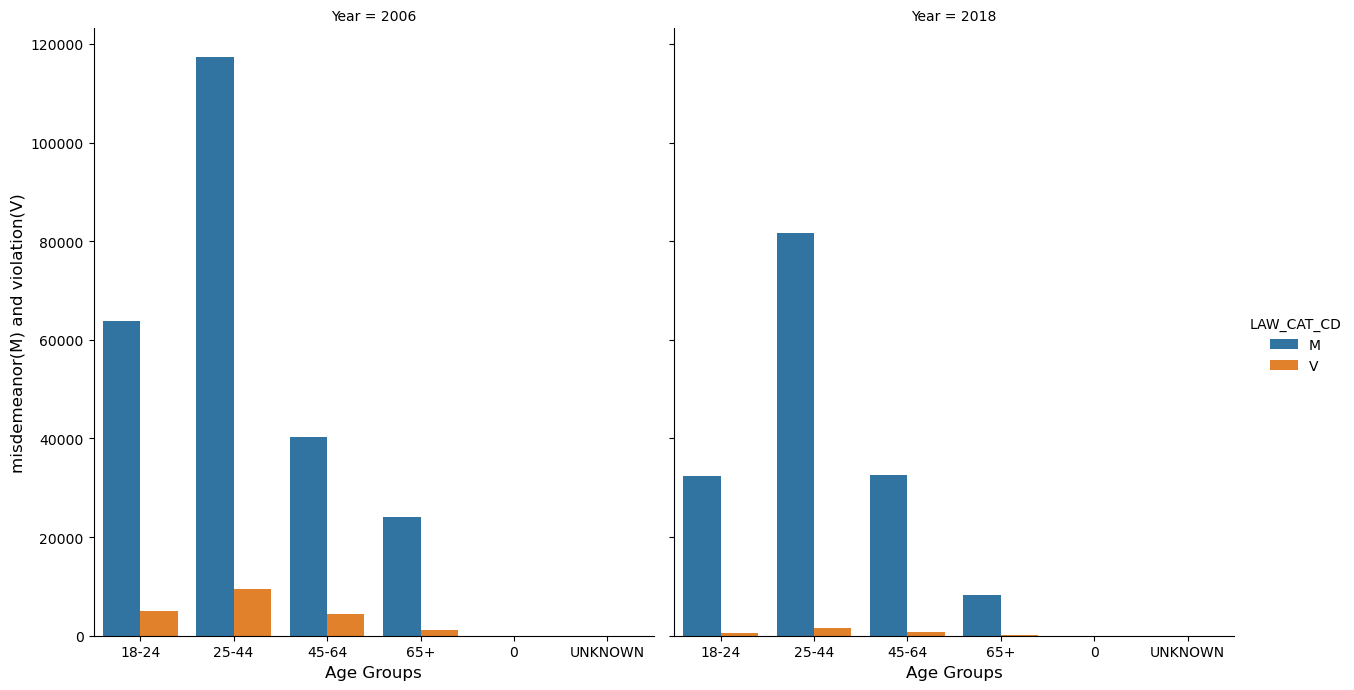

In [36]:
ax = sns.catplot(x="AGE_GROUP", hue='LAW_CAT_CD', col="Year",data=dataFiltered[(dataFiltered["LAW_CAT_CD"] == 'M') | (dataFiltered["LAW_CAT_CD"] == 'V') ], kind="count",height=7, aspect=0.9)
ax.set_xlabels('Age Groups', fontsize=12)
ax.set_ylabels('misdemeanor(M) and violation(V)', fontsize=12)
ax.savefig('output_Age_groups.png', dpi=300)


Plot the graph concerning the misdemeanors(M) and violations(V) committed during 2006 and 2018 for various age groups.

from above graph,In 2006 and 2018, the age group 25-44 had the largest number of crimes.

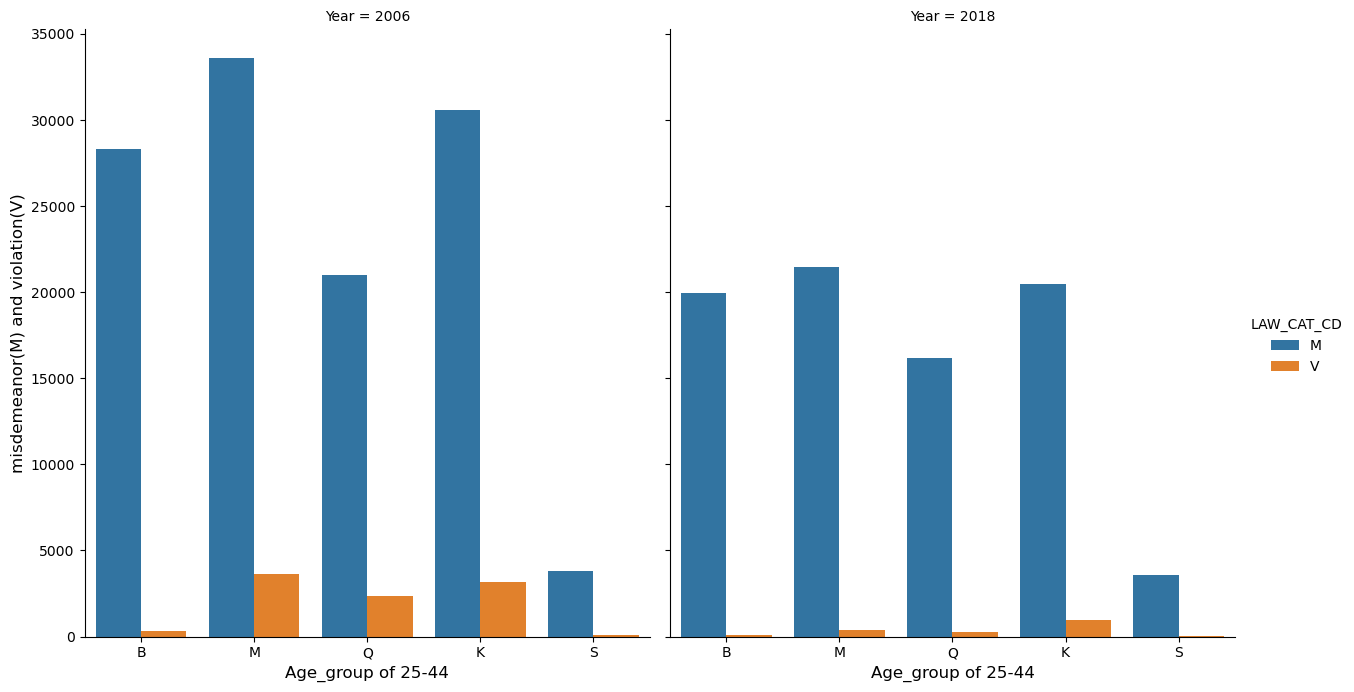

In [37]:
ax= sns.catplot(x="ARREST_BORO", hue='LAW_CAT_CD', col="Year",data=dataFiltered[((dataFiltered["LAW_CAT_CD"] == 'M') | (dataFiltered["LAW_CAT_CD"] == 'V')) & (dataFiltered['AGE_GROUP']=='25-44')], kind="count",height=7, aspect=0.9)
ax.set_xlabels('Age_group of 25-44', fontsize=12)
ax.set_ylabels('misdemeanor(M) and violation(V)', fontsize=12)
ax.savefig('output_Age_groups_25-44.png', dpi=300)


## c)Randomly pick a location (i.e., lat and long) for each Borough and compute the number of arrests in a radius of 3 miles from that location

The below function finds the distance in miles between the given longitudes and latitudes.

In [38]:
def distance(lat1,lon1,lat2,lon2):
    slat=radians(lat1)
    slon=radians(lon1)
    elat=radians(lat2)
    elon=radians(lon2)
    #The output c will be in kilometeres.
    c= 6371.01 * acos(sin(slat)*sin(elat) + cos(slat)*cos(elat)*cos(slon - elon))
    #now conver the c into miles and return the value.
    return c/1.60934

Now call the distance function to find the distance between the given coordinates and the longitudes and latitudes in the records.

In [39]:
a=[]
lat1=float(input("Starting latitude place_1: "))
lon1=float(input("Starting longitude place_1: "))
for i in range(0,len(dataFiltered)):
    a.append(distance(lat1,lon1,dataFiltered['Latitude'][i],dataFiltered['Longitude'][i]))

Starting latitude place_1: 40.76352298
Starting longitude place_1: -73.98707442


In [40]:
len(a)

618707

Add the new column "Distance in miles" with the distance between the given point and respective point.

In [41]:
dataFiltered['Distance in miles'] = a

In [42]:
dataFiltered

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Year,Month,Distance in miles
0,26043689,2006-12-31,793.0,WEAPONS POSSESSION 3,118.0,DANGEROUS WEAPONS,PL 2650205,F,B,44,...,18-24,M,BLACK HISPANIC,1008669.0,246692.0,40.843762,-73.911745,2006,12,6.801315
1,26029858,2006-12-31,567.0,"MARIJUANA, POSSESSION 4 & 5",235.0,DANGEROUS DRUGS,PL 2211500,M,S,123,...,18-24,M,WHITE,934968.0,136245.0,40.540508,-74.177311,2006,12,18.354252
2,26029459,2006-12-31,759.0,"PUBLIC ADMINISTATION,UNCLASS MISDEMEAN 4",359.0,OFFENSES AGAINST PUBLIC ADMINISTRATION,PL 1950500,M,B,40,...,18-24,M,BLACK,1005947.0,235372.0,40.812699,-73.921620,2006,12,4.823834
3,26029450,2006-12-31,515.0,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,B,47,...,25-44,M,BLACK,1025612.0,268457.0,40.903437,-73.850375,2006,12,12.021790
4,26018937,2006-12-31,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 140100F,M,Q,101,...,18-24,M,BLACK,1043516.0,157081.0,40.597637,-73.786589,2006,12,15.547431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618702,173142136,2018-01-01,639.0,AGGRAVATED HARASSMENT 2,361.0,OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV,PL 2403002,M,B,41,...,25-44,F,WHITE HISPANIC,1013086.0,236614.0,40.816088,-73.895824,2018,1,5.998018
618703,173135232,2018-01-01,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,44,...,25-44,M,BLACK HISPANIC,1007649.0,243339.0,40.834562,-73.915443,2018,1,6.174857
618704,173134328,2018-01-01,397.0,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105.0,ROBBERY,PL 1601503,F,M,10,...,45-64,M,BLACK,983620.0,208914.0,40.740105,-74.002275,2018,1,1.803031
618705,173134322,2018-01-01,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,M,30,...,25-44,M,BLACK HISPANIC,998981.0,242209.0,40.831479,-73.946770,2018,1,5.146890


Filter records from each borough that are in the range of 3 miles from the given location.

In [43]:
ARREST_BORO_Q = dataFiltered.loc[(dataFiltered['ARREST_BORO'] == 'Q') & (dataFiltered['Distance in miles'] <=3)]
ARREST_BORO_K = dataFiltered.loc[(dataFiltered['ARREST_BORO'] == 'K') & (dataFiltered['Distance in miles'] <=3)]
ARREST_BORO_B = dataFiltered.loc[(dataFiltered['ARREST_BORO'] == 'B') & (dataFiltered['Distance in miles'] <=3)]
ARREST_BORO_M = dataFiltered.loc[(dataFiltered['ARREST_BORO'] == 'M') & (dataFiltered['Distance in miles'] <=3)]
ARREST_BORO_S = dataFiltered.loc[(dataFiltered['ARREST_BORO'] == 'S') & (dataFiltered['Distance in miles'] <=3)]

In [44]:
print("the number of arrest in ARREST_BORO_Q is",len(ARREST_BORO_Q))
print("the number of arrest in ARREST_BORO_K is",len(ARREST_BORO_K))
print("the number of arrest in ARREST_BORO_B is",len(ARREST_BORO_B))
print("the number of arrest in ARREST_BORO_M is",len(ARREST_BORO_M))
print("the number of arrest in ARREST_BORO_S is",len(ARREST_BORO_S))

the number of arrest in ARREST_BORO_Q is 5586
the number of arrest in ARREST_BORO_K is 388
the number of arrest in ARREST_BORO_B is 0
the number of arrest in ARREST_BORO_M is 83037
the number of arrest in ARREST_BORO_S is 0


Create a new data frame with the filtered records from each borough in the range of 3 miles from the given location to plot the markers on the map.

In [45]:
dataFilteredLocation = dataFiltered.loc[(dataFiltered['Distance in miles'] <=3)]

In [46]:
dataFilteredLocation

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Year,Month,Distance in miles
19,26029848,2006-12-31,748.0,"CONTEMPT,CRIMINAL",359.0,OFFENSES AGAINST PUBLIC ADMINISTRATION,PL 2155003,M,Q,114,...,25-44,M,BLACK,1002344.0,216933.0,40.762097,-73.934685,2006,12,2.743431
58,26029721,2006-12-31,490.0,"STOLEN PROPERTY 3,POSSESSION",232.0,POSSESSION OF STOLEN PROPERTY 5,PL 1654000,M,M,14,...,65+,M,BLACK HISPANIC,987443.0,212093.0,40.748831,-73.988478,2006,12,1.017809
59,26029720,2006-12-31,490.0,"STOLEN PROPERTY 3,POSSESSION",232.0,POSSESSION OF STOLEN PROPERTY 5,PL 1654000,M,M,14,...,65+,M,WHITE HISPANIC,987443.0,212093.0,40.748831,-73.988478,2006,12,1.017809
60,26029713,2006-12-31,490.0,"STOLEN PROPERTY 3,POSSESSION",232.0,POSSESSION OF STOLEN PROPERTY 5,PL 1654000,M,M,9,...,25-44,M,WHITE HISPANIC,988519.0,202508.0,40.722522,-73.984600,2006,12,2.835893
61,26029702,2006-12-31,849.0,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,M,13,...,25-44,M,BLACK,986157.0,207673.0,40.736699,-73.993120,2006,12,1.880182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618657,173133820,2018-01-01,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,M,6,...,25-44,M,WHITE,985289.0,204044.0,40.726739,-73.996253,2018,1,2.586587
618672,173142253,2018-01-01,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,108,...,25-44,M,BLACK,996644.0,209958.0,40.742962,-73.955274,2018,1,2.188255
618689,173149757,2018-01-01,782.0,"WEAPONS, POSSESSION, ETC",236.0,DANGEROUS WEAPONS,PL 2650102,M,Q,114,...,25-44,M,WHITE HISPANIC,998644.0,214588.0,40.755668,-73.948047,2018,1,2.113409
618700,173142230,2018-01-01,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,M,13,...,25-44,M,ASIAN / PACIFIC ISLANDER,987551.0,209213.0,40.740926,-73.988089,2018,1,1.562239


In [47]:
len(dataFilteredLocation)

89011

Using a map, plot all of the sites that are less than or equal to 3 miles with the help of folium.

In [48]:
m = folium.Map(location=[dataFilteredLocation.iloc[0]['Latitude'], dataFilteredLocation.iloc[0]['Longitude']])
for i  in range(0,100):
    folium.Marker(
    location=[dataFilteredLocation.iloc[i]['Latitude'], dataFilteredLocation.iloc[i]['Longitude']],
   ).add_to(m)

We're only charting 100 points; if we have more than 10,000 places within 3 miles of each other, it will show up, but it will be difficult to visualize.

The below map consists of the arrests happened in the 3 mile radius from the given coordinates in the years 2006 and 2018.

In [49]:
#This shows the map whch was prepared above.
m